In [1]:
# import class MergerRemnant
import Remnant
from Remnant import MergerRemnant

# import all modules needed 
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def RotationCurve(rho, rr, Vcirc, r2, v2, snapnumber):
    fig = plt.figure(figsize=(12,10))
    ax = plt.subplot(111)

    plt.hist2d(rho, np.abs(vphi), bins=150, norm=LogNorm())
    # plt.scatter(rho, np.abs(vphi))
    plt.colorbar()

    # Add the vcirc
    plt.plot(rr, Vcirc, color="red", label = "V_circ")
    #plt.plot(-r2, -v2, color="blue")

    # Add the v_phi
    plt.plot(r2, v2, color="blue", label = "V_phi")
    #plt.plot(-r2, -v2, color="blue")

    # Add axis labels
    plt.xlabel('R (kpc)', fontsize=22)
    plt.ylabel(r'v$_\phi$ (km/s)', fontsize=22)

    #set axis limits
    plt.ylim(0, 300)
    plt.xlim(0, 50)

    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size

    # Save file
    plt.savefig('plot/V%d.png'%snapnumber)

In [9]:

MW_M31 = MergerRemnant("MW","M31", 560)
MW_M31.RotateAxis()
# MW_M31.EdgeOnVIew()
rr, Vcirc = MW_M31.V_circ()
r2, v2, rho, vphi = MW_M31.V_Phi()

# RotationCurve(rho, rr, Vcirc, r2, v2, 560)
voversigma = MW_M31.Vmax_over_sigma(150, 40)
print(voversigma.shape)

(50,)


V/sigma:  0.3320656776797955


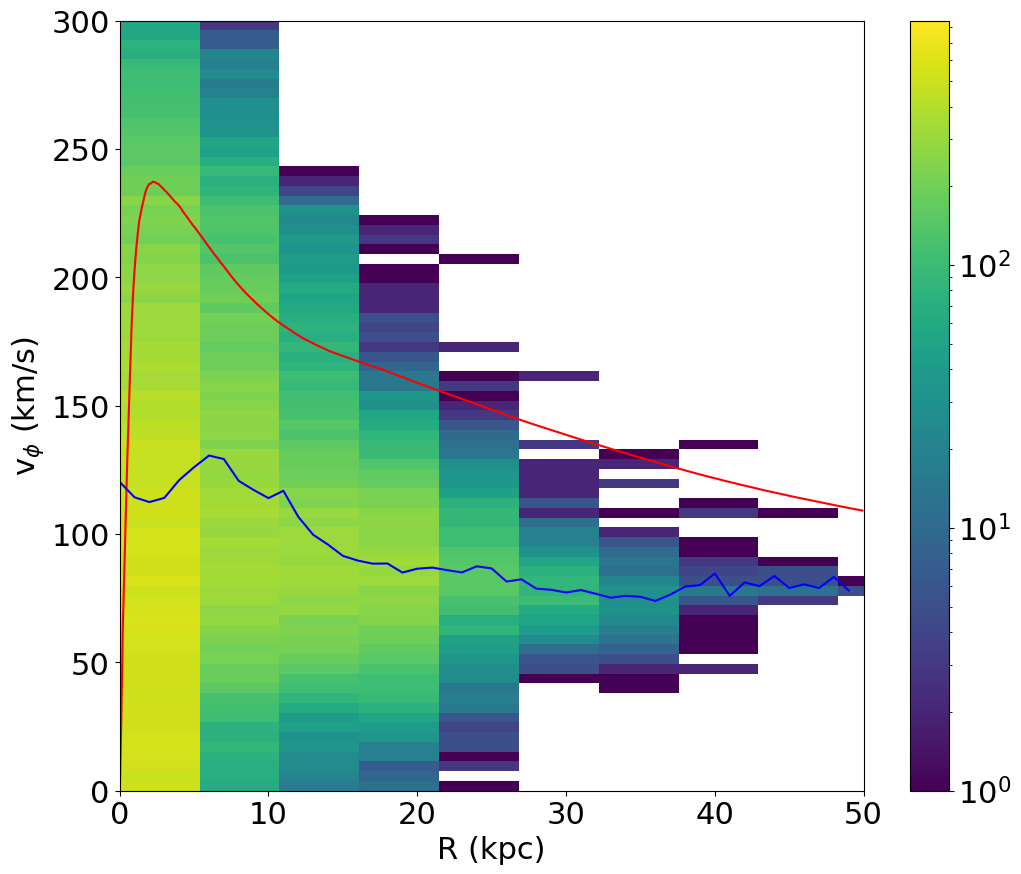

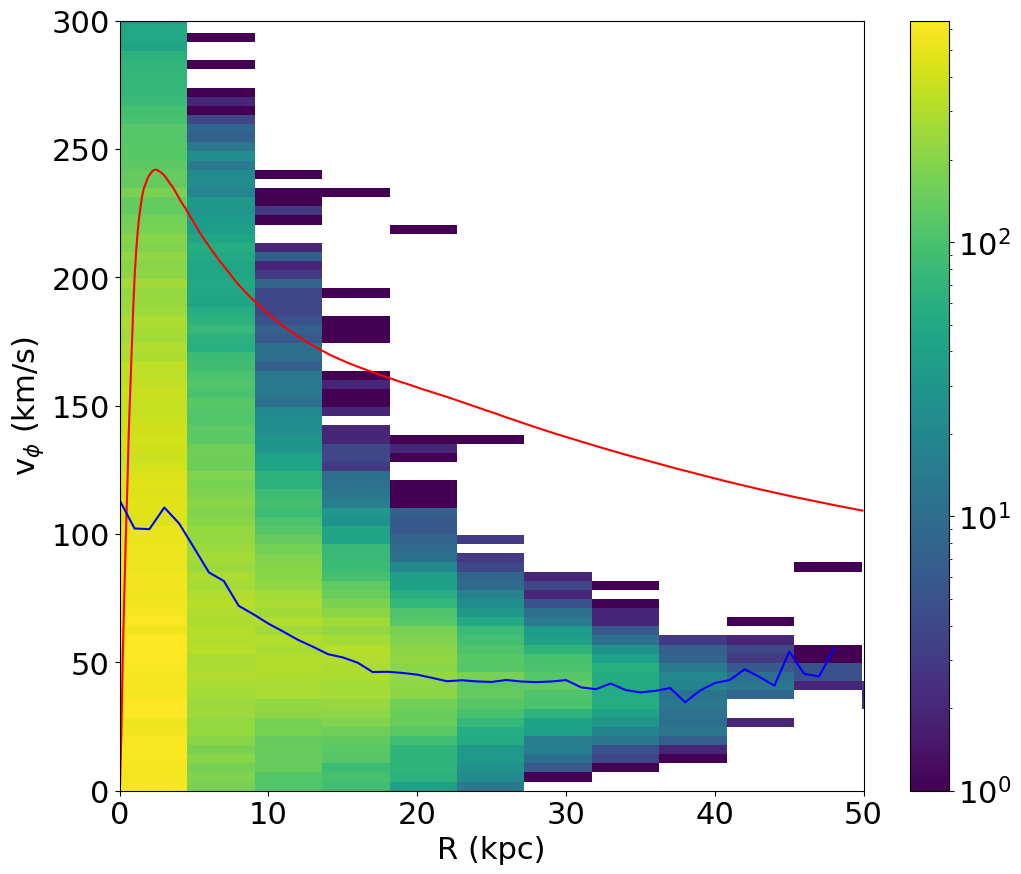

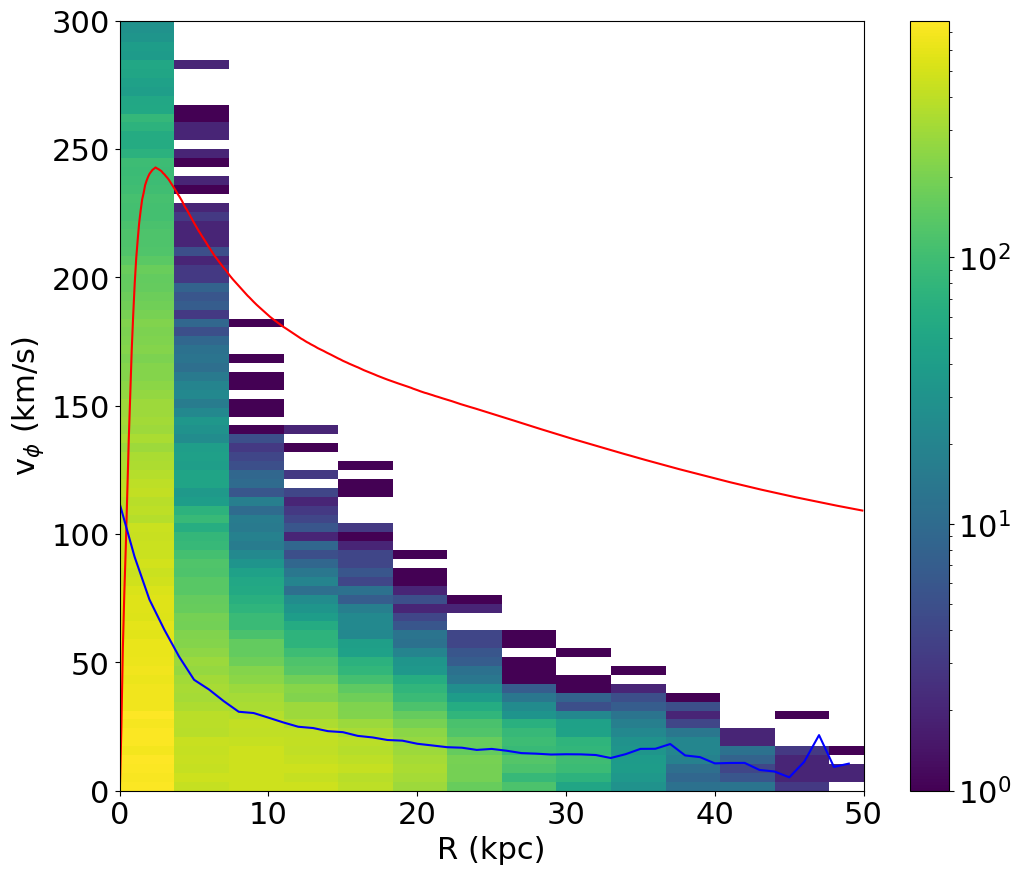

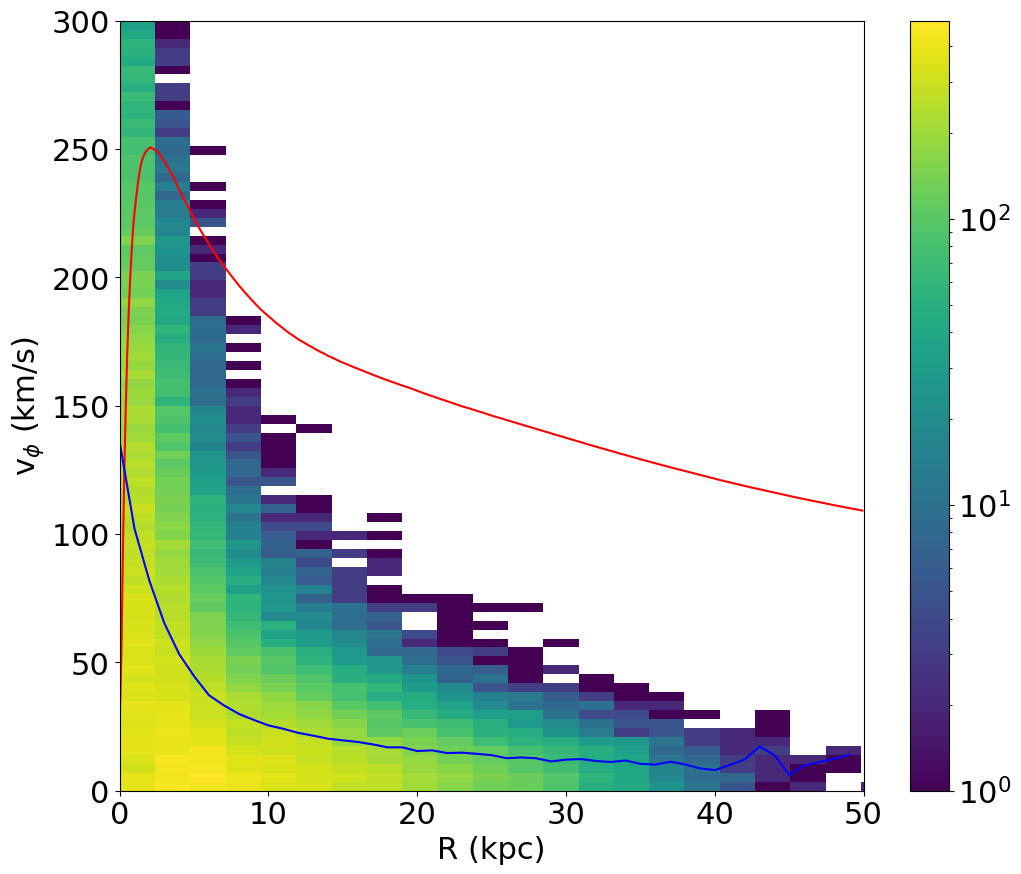

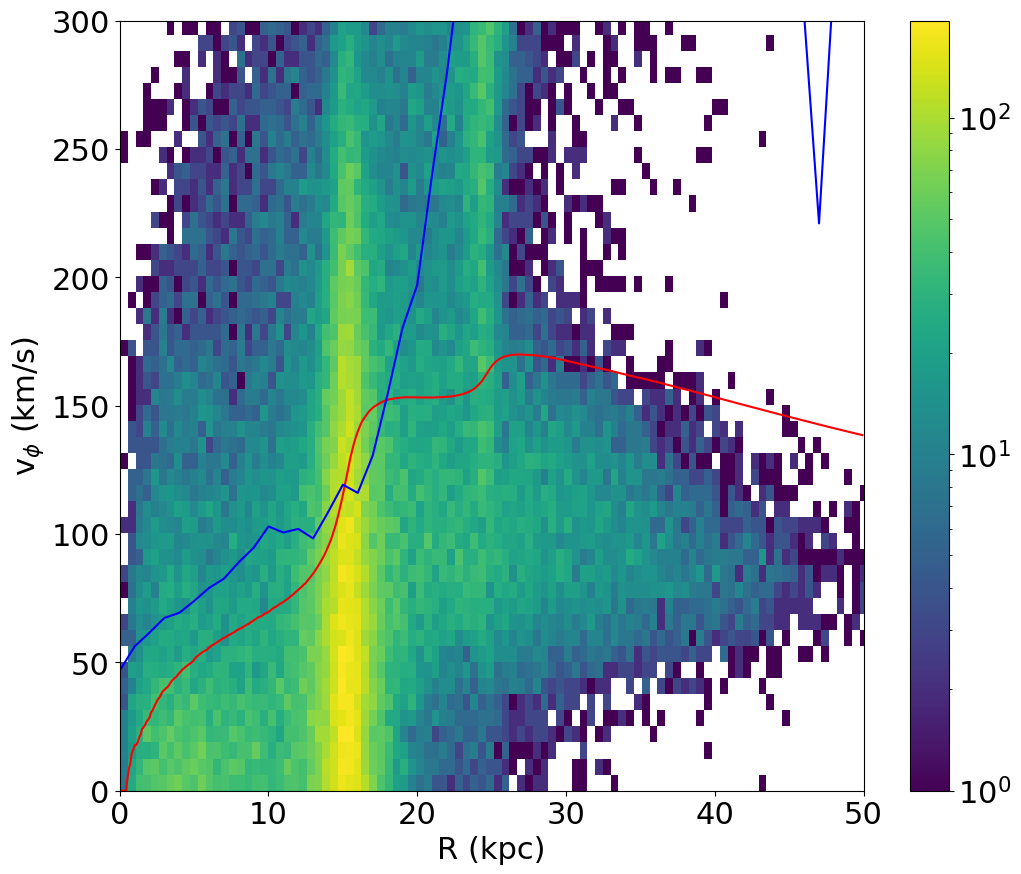

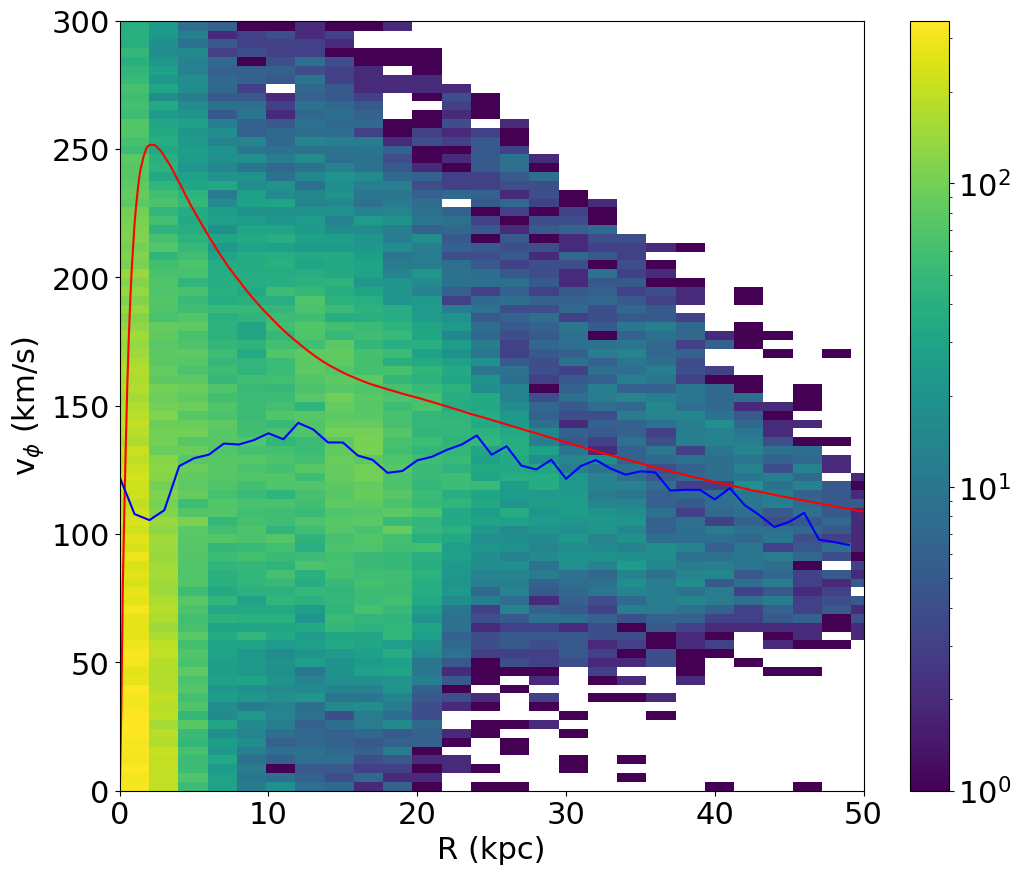

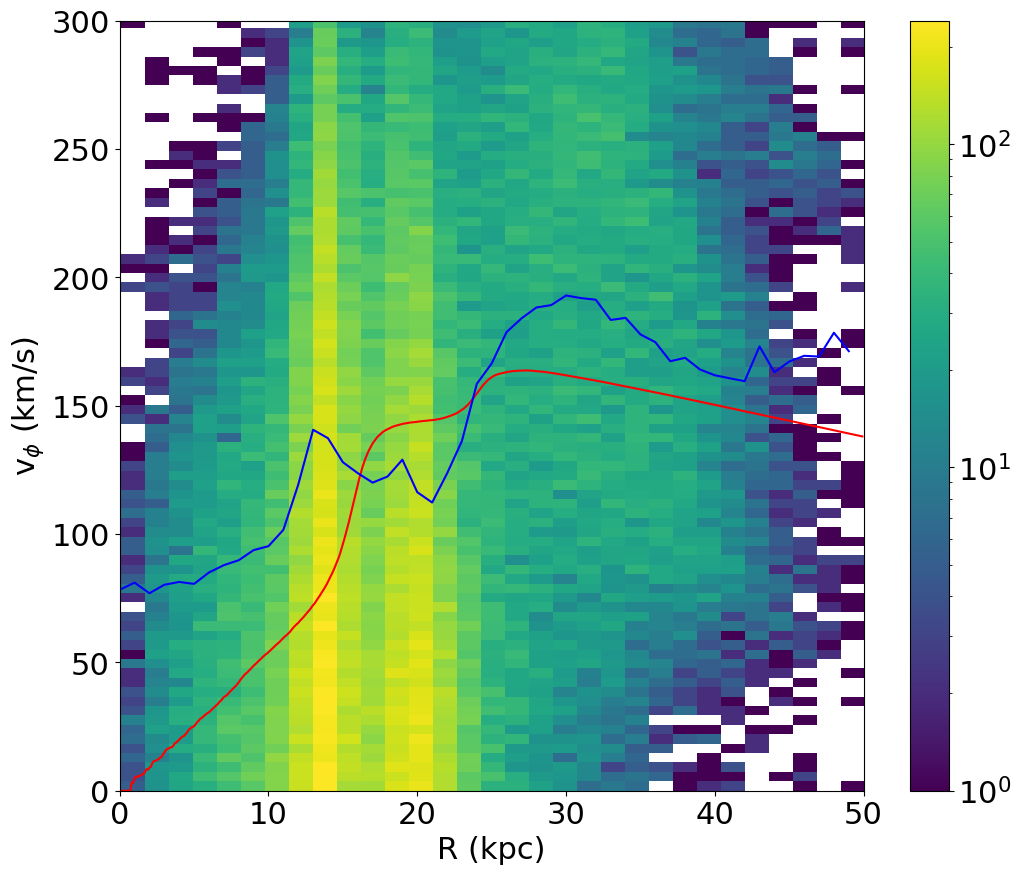

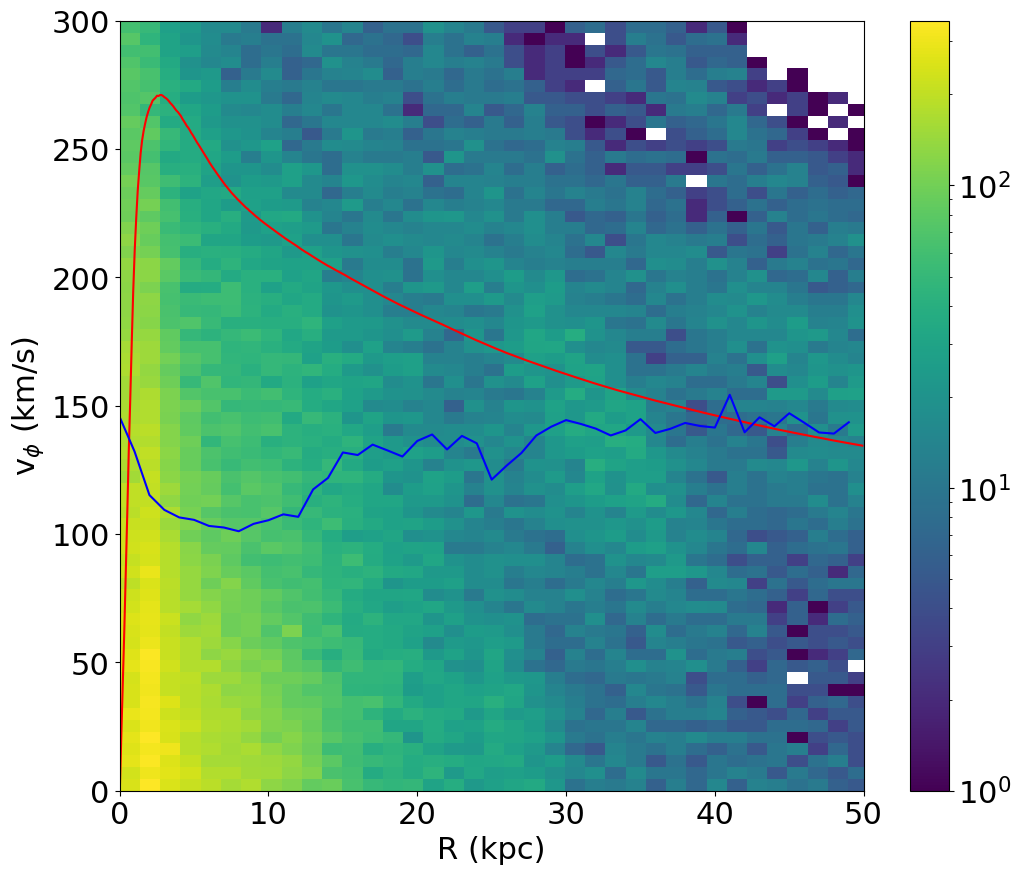

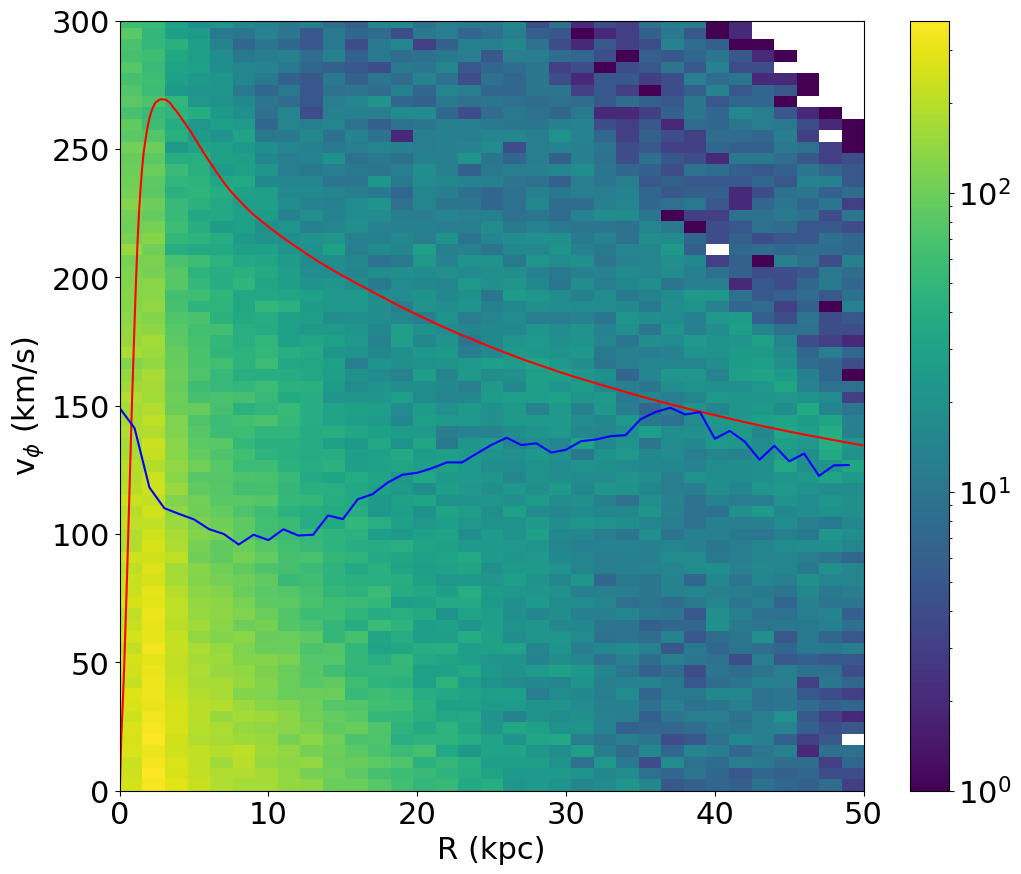

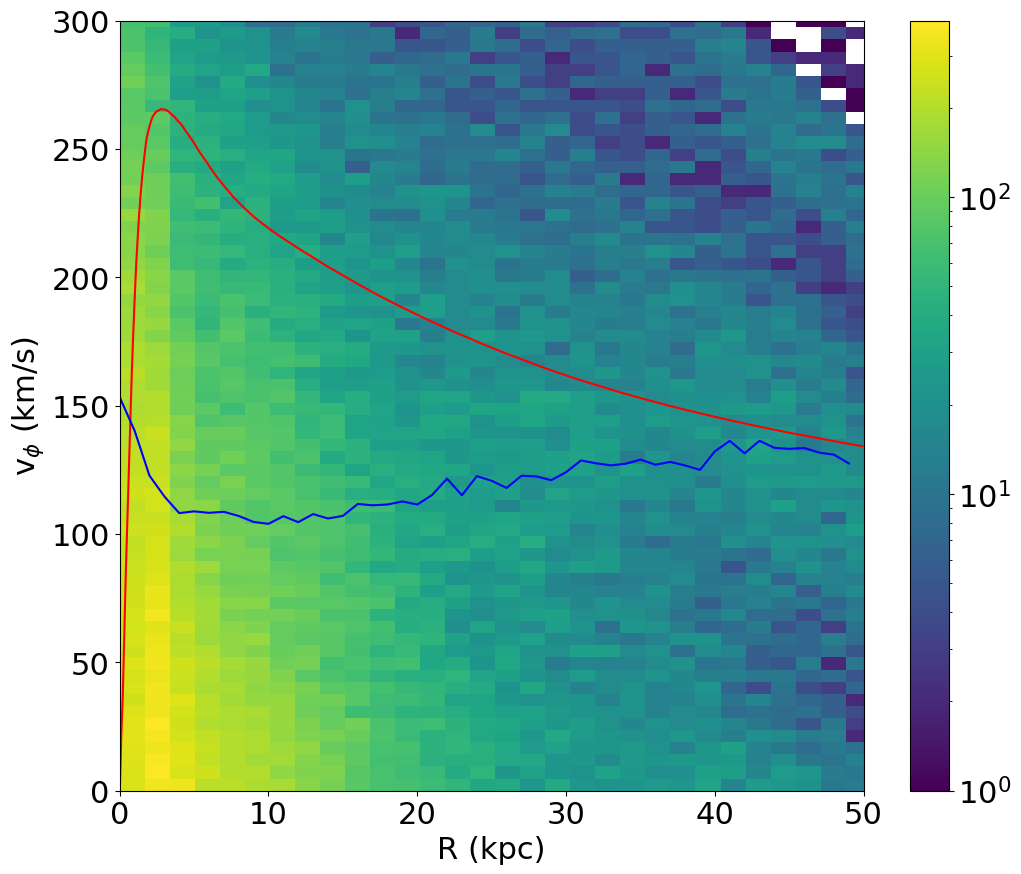

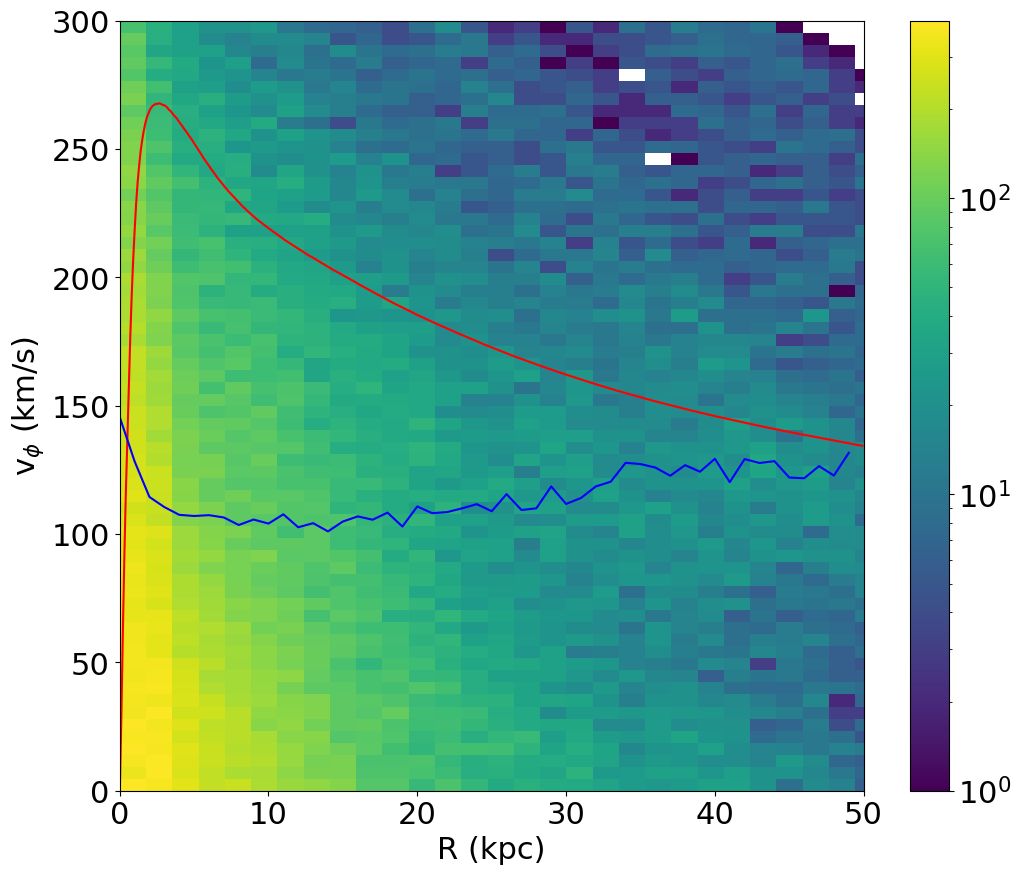

In [13]:
# make array of snapshot numbers 0-10 Gyrs by step 2 Gyrs
t = np.linspace(0, 10, 11)
snaps = t * 0.7 /10 * 1000
snapnumbers = snaps.round().astype(int)

voversigma = np.zeros((np.size(snapnumbers), 50) )

# create MergerRemenant object for each snapshots
for i in range(0, len(snapnumbers), 1): 
    MW_M31 = MergerRemnant("MW","M31", snapnumbers[i])
    MW_M31.RotateAxis()
    # MW_M31.EdgeOnVIew()
    rr, Vcirc = MW_M31.V_circ()
    r2, v2, rho, vphi = MW_M31.V_Phi()
    RotationCurve(rho, rr, Vcirc, r2, v2, snapnumbers[i])
    voversigma[i, :] = MW_M31.Vmax_over_sigma(150, 40)
    
    
print('V/sigma: ',  voversigma[i, 20])



In [14]:
print('V/sigma: ',  voversigma[:, 20])

V/sigma:  [1.45107164 1.86586409 2.1586365  2.18007706 0.29070348 0.85442281 0.29200189 0.30804584 0.33149987 0.34502066 0.33206568]


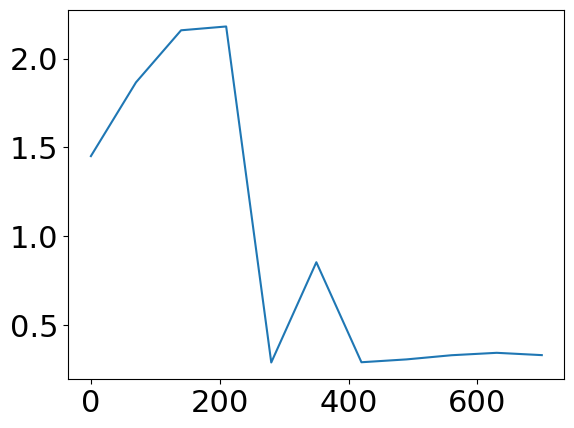

In [15]:
plt.plot(snapnumbers, voversigma[:, 20])